### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '2'
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler #Import StandardScaler for Feature Scaling
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

### Task 2: Import the libraries and prepare the data

In [8]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Define path

path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Exercise 6.1'

In [12]:
df = pd.read_csv(os.path.join(path, '6.1_csvs', 'Global_Happiness_2015_2019_Cleaned.csv'))

In [14]:
# Keep only numeric columns needed for clustering (remove categorical variables like Country, Region, etc.)
numeric_df = df.select_dtypes(include='number')

In [16]:
# Drop any rows with missing values
numeric_df = numeric_df.dropna()

In [22]:
# Standardize features to avoid scale bias
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

### Task 3: Use the Elbow Technique to Choose Optimal Clusters

In [45]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [47]:
score = [kmeans[i].fit(numeric_df).score(numeric_df) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

[-1593779.3936605486,
 -400327.98724417575,
 -179442.69001959264,
 -101542.63859191099,
 -66082.77513252938,
 -46864.47802237717,
 -34741.834959413114,
 -27097.813132605334,
 -21942.37985964863]

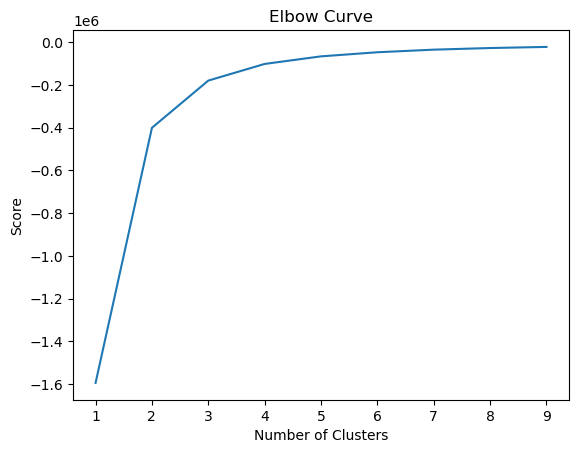

In [54]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Task 4: Decide on the Number of Clusters

### **Decision:** I chose the optimal number of clusters(k)=3 from the elbow plot because it represents the "elbow" where the rate of explained variance begins to level off significantly.

### Task 5: Run the K-Means Algorithm

In [61]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [63]:
# Fit the k-means object to the data.

kmeans.fit(numeric_df)

KMeans(n_clusters=3)

### Task 6: Attach Cluster Labels to DataFrame

In [65]:
numeric_df['clusters'] = kmeans.fit_predict(numeric_df)

In [67]:
numeric_df.head()

,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Trust,Generosity,clusters
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2


In [69]:
numeric_df['clusters'].value_counts()

clusters
0    267
1    260
2    254
Name: count, dtype: int64

### Task 7: Create Visualizations of the Clusters

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

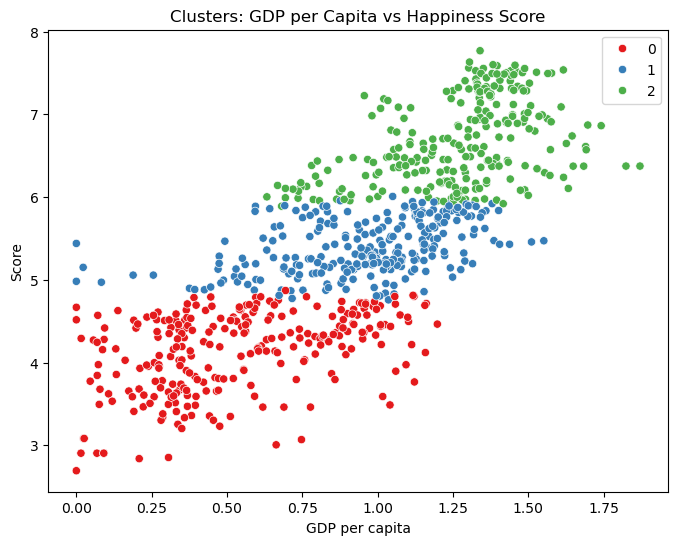

In [79]:
# Example 1: Score vs GDP per capita
plt.figure(figsize=(8,6))
sns.scatterplot(data=numeric_df, x='GDP per capita', y='Score', hue=kmeans.labels_, palette='Set1')
plt.title('Clusters: GDP per Capita vs Happiness Score')
plt.show()

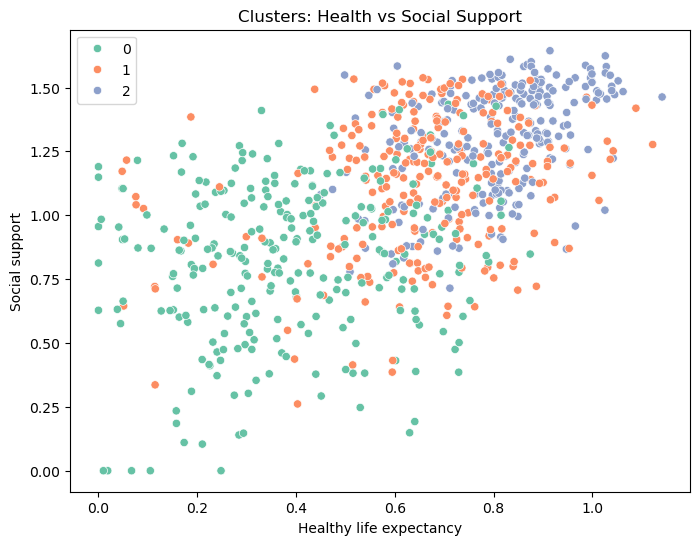

In [81]:
# Example 2: Healthy life expectancy vs Social support
plt.figure(figsize=(8,6))
sns.scatterplot(data=numeric_df, x='Healthy life expectancy', y='Social support', hue=kmeans.labels_, palette='Set2')
plt.title('Clusters: Health vs Social Support')
plt.show()

### Task 8: Discuss Why the Clusters Make Sense

#### **Cluster Interpretation:**
- Cluster 0: Likely includes high-scoring, high-GDP countries (e.g., Western Europe).
- Cluster 1: Includes moderately scoring countries with decent social support.
- Cluster 2: Contains low-scoring countries with lower GDP and health indicators.<br>

If clusters overlap or are hard to interpret, this signals the need to include/exclude variables or consider more clusters.


### Task 9: Calculate Descriptive Stats by Cluster

In [103]:
# Group by cluster and get means
numeric_df.groupby('cluster').agg({'GDP per capita':['mean', 'median'], 
                         'Score':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                          'Healthy life expectancy':['mean', 'median']})

GDP per capita               Score         Social support  \
                      mean    median      mean  median           mean   
cluster                                                                 
dark purple       1.267743  1.308485  6.665539  6.5735       1.303986   
pink              0.535356  0.476180  4.132491  4.2520       0.822338   
purple            0.958871  0.999365  5.396908  5.3525       1.122116   

                      Healthy life expectancy            
               median                    mean    median  
cluster                                                  
dark purple  1.324055                0.806516  0.817500  
pink         0.858000                0.386445  0.363150  
purple       1.160919                0.654627  0.664445

### Task 10: Propose Future Use of Clustering Results

#### **Future Use Cases:**
- Tailor country-specific development strategies based on their cluster characteristics.
- Build dashboards to track improvements or movements between clusters over time.
- Use clusters as a feature in predictive modeling to capture socioeconomic patterns.


In [ ]:
# Define export path
export_path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Exercise 6.1\clustered_data.csv'

# Export to CSV
numeric_df.to_csv(export_path, index=False)
